# Self Study Session C — Programming Paradigms


## Exercise C.1 — UML Fact Checker


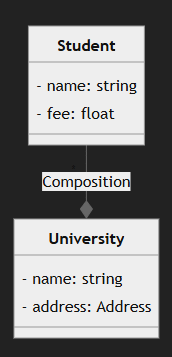

1. No two universities can have the same name? → **No**  
   Es ist keine Eindeutigkeitsbedingung für den Namen angegeben.

2. A university and a student can not have the same name? → **No**  
   UML verbietet gleiche Namen zwischen Klassen nicht.

3. No student studies at more than one university? → **Yes**  
   Durch Komposition gehört ein Student genau zu einer University.

4. Each student studies at at least one university? → **Yes**  
   Ein Student existiert als Teil einer University.

5. Two students with the same name can not study at the same university? → **No**  
   Name ist nicht als eindeutig definiert.

6. Two students with the same name can not study at different universities? → **No**

7. Two universities can have the same address? → **Yes**  
   Keine Eindeutigkeit für Address definiert.

Is there a way to specify an attribute in UML as unique? → **Yes**  
z.B. durch Constraints wie "unique" oder "OCL"

## Exercise C.2 (From text to UML)

Convert the following description into an appropriate UML diagram, with multiplicities and associations.

- Every person has a name, a phone number and an e-mail address.
- Every address is only occupied by one person, some addresses might have no inhabitant.
- Each address is associated with a street, a city, an area code, and a country.
- Addresses can be verified as a home address for a person and printed for post service.
- There are two types of persons:
- Students that can enlist for a class
- Professors that can receive a salary
- A student has a study ID and an average grade.


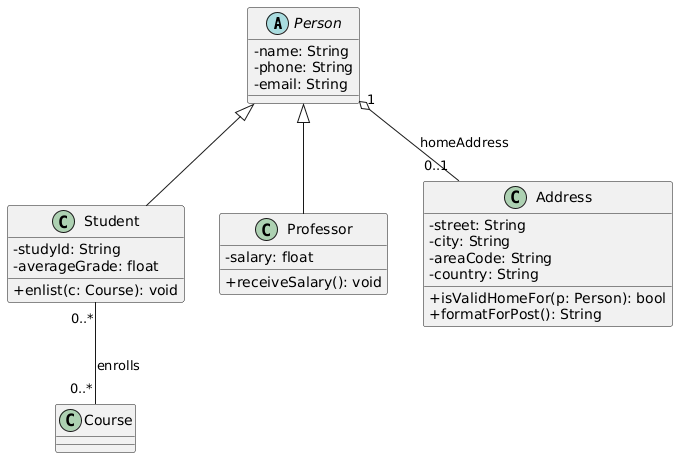

## Exercise C.3 (From UML to Python)

Convert the UML diagram from Exercise C.2 into Python code and test your classes.


In [1]:
from __future__ import annotations

from dataclasses import dataclass, field
from abc import ABC
from typing import Optional, Set


@dataclass
class Address:
    street: str
    city: str
    area_code: str
    country: str
    occupant: Optional["Person"] = None  # 0..1 Person

    def is_valid_home_for(self, p: "Person") -> bool:
        return self.occupant is p

    def format_for_post(self) -> str:
        return f"{self.street}\n{self.area_code} {self.city}\n{self.country}"


@dataclass(eq=True, frozen=True)
class Course:
    name: str


@dataclass
class Person(ABC):
    name: str
    phone: str
    email: str
    home_address: Address  # 1 Address

    def __post_init__(self) -> None:
        # keep the 0..1 occupant constraint consistent
        if self.home_address.occupant is not None and self.home_address.occupant is not self:
            raise ValueError("This address is already occupied by another person.")
        self.home_address.occupant = self


@dataclass
class Student(Person):
    study_id: str
    average_grade: float
    courses: Set[Course] = field(default_factory=set)

    def enlist(self, c: Course) -> None:
        self.courses.add(c)


@dataclass
class Professor(Person):
    salary: float

    def receive_salary(self) -> float:
        return self.salary


### Hinweis

Beim Erstellen einer Person wird automatisch address.occupant gesetzt.
Wenn eine zweite Person dieselbe Adresse verwenden möchte, wird ein Fehler ausgelöst (max. 1 Bewohner).


In [2]:
# Create addresses
addr1 = Address(street="Main Street 1", city="Innsbruck", area_code="6020", country="Austria")
addr2 = Address(street="Campus Road 5", city="Innsbruck", area_code="6020", country="Austria")

# Create courses
c1 = Course("Software Design")
c2 = Course("Data Science")

# Create persons
s = Student(
    name="Peter",
    phone="+43 123 456",
    email="peter@example.com",
    home_address=addr1,
    study_id="S12345",
    average_grade=1.7
)

p = Professor(
    name="Dr. Ada",
    phone="+43 987 654",
    email="ada@example.com",
    home_address=addr2,
    salary=5000.0
)

# Student enrolls
s.enlist(c1)
s.enlist(c2)

print("Student:", s.name, s.study_id, sorted([c.name for c in s.courses]))
print("Professor:", p.name, "salary received:", p.receive_salary())

print("\nAddress label (student):")
print(addr1.format_for_post())

print("\nVerify home address:")
print("addr1 is student's home:", addr1.is_valid_home_for(s))
print("addr1 is professor's home:", addr1.is_valid_home_for(p))


Student: Peter S12345 ['Data Science', 'Software Design']
Professor: Dr. Ada salary received: 5000.0

Address label (student):
Main Street 1
6020 Innsbruck
Austria

Verify home address:
addr1 is student's home: True
addr1 is professor's home: False


## Exercise C.4 (Interface)

Consider the UML diagram and implement it in Python with interfaces.

Set lives for a Cat to the appropriate value (7), feed some cat food generated
with random integers uniformly distributed between −10 and 10 and observe how much
food it can eat until it dies.

Plot this for different initial values of currentFood.


In [5]:
from abc import ABC, abstractmethod
import random
import matplotlib.pyplot as plt


# --- Interfaces ---

class FourLegged(ABC):
    
    @abstractmethod
    def run(self, destination: str):
        pass


class OxygenBreather(ABC):
    
    @abstractmethod
    def breath(self):
        pass


# --- Base class ---

class Animal:
    
    def __init__(self, lives: int, currentFood: int):
        self.lives = lives
        self.currentFood = currentFood
        
    def eat(self, food: int):
        self.currentFood += food
        
        # if food level drops below 0 → lose life
        if self.currentFood < 0:
            self.lives -= 1
            self.currentFood = 0


# --- Cat class ---

class Cat(Animal, FourLegged, OxygenBreather):
    
    def __init__(self, currentFood: int):
        super().__init__(lives=7, currentFood=currentFood)
    
    def getLivesLeft(self):
        return self.lives
    
    def getCurrentAmountOfFood(self):
        return self.currentFood
    
    def decreaseLives(self):
        self.lives -= 1
    
    def run(self, destination: str):
        pass
    
    def breath(self):
        pass


In [6]:
def simulate_cat(initial_food: int, trials=1000):
    cat = Cat(initial_food)
    total_food_eaten = 0
    
    while cat.getLivesLeft() > 0 and trials > 0:
        food = random.randint(-10, 10)
        cat.eat(food)
        total_food_eaten += food
        trials -= 1
        
    return total_food_eaten


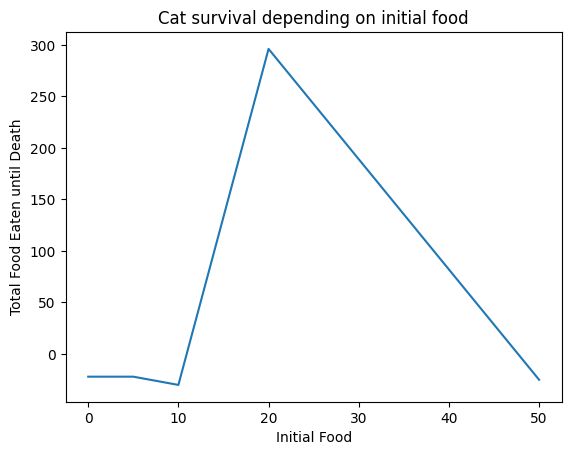

In [7]:
initial_food_values = [0, 5, 10, 20, 50]
results = []

for value in initial_food_values:
    results.append(simulate_cat(value))

plt.plot(initial_food_values, results)
plt.xlabel("Initial Food")
plt.ylabel("Total Food Eaten until Death")
plt.title("Cat survival depending on initial food")
plt.show()


### Erklärung

- Cat erbt von Animal und implementiert die Interfaces FourLegged und OxygenBreather.
- Die Simulation füttert die Katze mit zufälligen Werten zwischen −10 und 10.
- Sinkt der Nahrungswert unter 0, verliert die Katze ein Leben.
- Der Plot zeigt den Zusammenhang zwischen Start-Nahrung und überlebter Futtermenge.


## Exercise C.5 (Iterators)

Explain the output of the following code fragment.


In [1]:
square = lambda a: a ** 2
iterator = map(square, range(1, 5))

for i in iterator:
    print(i)

print(f"{list(iterator) = }")

iterator = map(square, range(1, 5))
print(f"{list(iterator) = }")


1
4
9
16
list(iterator) = []
list(iterator) = [1, 4, 9, 16]


Antwort:

Die Funktion map() liefert einen Iterator und keine Liste.

- Ein Iterator kann nur einmal vollständig durchlaufen werden.
- In der for-Schleife wird der Iterator komplett verbraucht (1, 4, 9, 16).
- Danach enthält der Iterator keine weiteren Elemente mehr, deshalb ergibt list(iterator) eine leere Liste.

Danach wird ein neuer Iterator erzeugt:
iterator = map(square, range(1, 5)).

Dieser wurde noch nicht verbraucht, deshalb enthält list(iterator) wieder alle Werte [1, 4, 9, 16].


## Exercise C.6 (Accumulator)

Use itertools.accumulate for the following tasks:

- Compute a running maximum in a list of numbers.
- Compute an amortization schedule for a loan using accumulate (you may also add fees).


In [2]:
from itertools import accumulate

numbers = [3, 1, 4, 1, 5, 9, 2, 6]

running_max = list(accumulate(numbers, max))
running_max


[3, 3, 4, 4, 5, 9, 9, 9]

Antwort: accumulate(..., max) liefert nach jedem Element das aktuelle Maximum (laufendes Maximum).


In [3]:
from itertools import accumulate

def amortization_schedule(
    principal: float,
    annual_interest: float,
    payment: float,
    years: int,
    annual_fee: float = 0.0,
):
    # update function for accumulate: previous balance -> next balance
    def step(balance: float, _year_index: int) -> float:
        return balance * (1 + annual_interest) - payment - annual_fee

    # years steps -> years+1 balances (including initial)
    return list(accumulate(range(years), step, initial=principal))


schedule = amortization_schedule(
    principal=1000,
    annual_interest=0.05,
    payment=100,
    years=10,
    annual_fee=0.0
)

schedule


[1000,
 950.0,
 897.5,
 842.375,
 784.4937500000001,
 723.7184375000002,
 659.9043593750002,
 592.8995773437503,
 522.5445562109378,
 448.67178402148477,
 371.105373222559]

In [4]:
# rounded view (for a compact example-like output)
[round(x) for x in schedule]


[1000, 950, 898, 842, 784, 724, 660, 593, 523, 449, 371]

Antwort: Der Tilgungsplan ist eine Liste der Kontostände nach jedem Jahr.
accumulate berechnet dabei aus dem vorherigen Kontostand jeweils den nächsten, basierend auf Zinsen, Zahlung (und optional Gebühren).
Kleine Abweichungen zur Beispiel-Liste können durch Rundung entstehen.


## Exercise C.7 (Filter)

Use functional programming and in particular the filter function to:

- Find all palindromes in a list of strings.
- Count the number of vowels in a string.


In [5]:
words = ["level", "python", "radar", "hello", "madam", "world"]

is_palindrome = lambda s: s == s[::-1]

palindromes = list(filter(is_palindrome, words))
palindromes


['level', 'radar', 'madam']

Antwort: Mit filter() werden nur jene Wörter behalten,
für die die Bedingung s == s[::-1] (Palindromeigenschaft) wahr ist.


In [6]:
text = "Functional Programming"

vowels = "aeiouAEIOU"

vowel_count = len(list(filter(lambda c: c in vowels, text)))
vowel_count


7

Antwort: filter() behält nur Zeichen, die in der Vokalmenge enthalten sind.
Die Anzahl ergibt sich aus der Länge der gefilterten Liste.


## Exercise C.8 (Creating a module)

Create your own module. The module should have the following functions:

- For a given year, check if it is a leap year.
- For a given date, return the day of the week, use the algorithm outlined here.
  Hint: Dictionaries can help you for some of the mappings.
- Return the week number of the year of a certain date, you can use the algorithm outlined here.
- Provide doc strings for each of your methods and for the module itself.


In [10]:
import my_calendar as cal

print(cal.is_leap_year(2024))
print(cal.is_leap_year(1900))
print(cal.is_leap_year(2000))

print(cal.day_of_week(26, 1, 1999))

print(cal.week_number(31, 12, 2024))


True
False
True
Tuesday
52


Antwort:

Das Modul enthält drei Funktionen mit Docstrings sowie einen Modul-Docstring.
Die Schaltjahrfunktion nutzt die Gregorianischen Teilbarkeitsregeln.
Der Wochentag wird über die in der Aufgabenstellung beschriebene Monatscode-Logik und Korrekturen berechnet und als String zurückgegeben.
Die Wochenzahl wird über den Tag-im-Jahr berechnet und durch 7 geteilt; dadurch ergibt sich eine einfache, nachvollziehbare Wochenindizierung.


## Exercise C.9 (Using your own module)

Use the module created in Exercise C.8 and build a program on it.

- Include the local module via pdm.
- Use the module to generate from a date the following output:
  - leap year -> true/false
  - day of the week
  - week of the year
- How can you deal with european and american styled day-month order?
- Update your module by adding the above described function where the returned value should be a dictionary with keys: leapyear, weekday, week.
- Can you use the new function in the module right away or do you need to reinstall it somehow?


In [2]:
import my_calendar as cal
info = cal.date_summary(1, 1, 2024)

print("leap year ->", info["leapyear"])
print("day of the week ->", info["weekday"])
print("week of the year ->", info["week"])


leap year -> True
day of the week -> Monday
week of the year -> 0


In [3]:
def parse_date(date_string: str, order: str = "DMY"):
    day1, day2, year = map(int, date_string.split("/"))

    if order == "DMY":      # European format
        return day1, day2, year
    elif order == "MDY":    # American format
        return day2, day1, year
    else:
        raise ValueError("Order must be 'DMY' or 'MDY'")


d, m, y = parse_date("01/26/2024", order="MDY")
print(cal.date_summary(d, m, y))


{'leapyear': True, 'weekday': 'Friday', 'week': 3}


Antwort:

Zur Unterscheidung zwischen europäischem (Tag/Monat/Jahr) und amerikanischem
(Monat/Tag/Jahr) Format wird ein zusätzlicher Parameter verwendet.

Alternativ kann man das ISO-Format YYYY-MM-DD verwenden,
da es keine Mehrdeutigkeit enthält.


Antwort:

Da das Modul als lokale Datei im Projekt eingebunden ist,
ist keine Neuinstallation über pdm notwendig.

Nach Änderungen am Modul ist lediglich ein Neustart des Python-Kernels erforderlich,
da Python importierte Module im Speicher cached.
